## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import adjusted_rand_score
from sklearn.manifold import TSNE
import time
import sys
from BLCC import MixtureModelBernoulli

# Get data
df = pd.read_csv("../Data/test/test_data.csv",index_col=0)

# Pre Cluster Analysis
## TSNE Plot

Text(0.5, 1.0, 'Preselected TSNE plot\nperp:40, randstate:294')

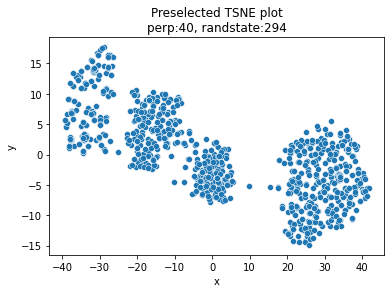

In [2]:
# Get projected data
df_proj = TSNE(perplexity=40,
               random_state=294,
               metric="hamming",
               square_distances=True).fit_transform(df)
df_proj = pd.DataFrame(df_proj,columns=["x","y"])
# Plot on ax
sns.scatterplot(x="x",
                y="y",
                data=df_proj)
plt.title(f"Preselected TSNE plot\nperp:{40}, randstate:{294}")

This data seems very clusterable

# Run model

In [3]:
num_classes = 4
random_state = 100
max_iter = 250
burn_in = 0

print("Data Size")
print("---------")
print(f"Samples: {df.shape[0]}")
print(f"Features: {df.shape[1]}")

# Set up model
C_list = MixtureModelBernoulli(num_classes=num_classes,
                               random_state=random_state,
                               burn_in=burn_in,
                               max_iter=max_iter)


# fit the data to the model
print(f"\nRunning {max_iter+burn_in} iterations...",end="")
start_time = time.time()
C_list.fit(df)
total_time = time.time() - start_time

print("DONE!")
print(f"Total time: {round(total_time,5)} (secs)")

# Get parameter estimates
theta, pi, k = C_list.get_params()

Data Size
---------
Samples: 1000
Features: 20

Running 250 iterations...DONE!
Total time: 16.2058 (secs)


# Print Parameters

## Pi

In [4]:
pi = pd.DataFrame(pi)
pi.columns = ["Probability"]
pi.index = [f"Cluster {x}" for x in np.arange(0,len(pi)).astype(str)]
display(pi)

,Probability
Cluster 0,0.287700
Cluster 1,0.167448
Cluster 2,0.152861
Cluster 3,0.387991


## Theta

In [5]:
theta = pd.DataFrame(theta)
theta.columns = [f"Item {x}" for x in np.arange(1,theta.shape[1]+1).astype(str)]
theta.index = [f"Cluster {x}" for x in np.arange(0,theta.shape[0]).astype(str)]
display(theta)

,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,Item 11,Item 12,Item 13,Item 14,Item 15,Item 16,Item 17,Item 18,Item 19,Item 20
Cluster 0,0.041692,0.056517,0.021516,0.259442,0.268374,0.280556,0.016617,0.466415,0.315788,0.037710,0.092907,0.221878,0.008933,0.161693,0.024825,0.184940,0.053740,0.040496,0.009405,0.030665
Cluster 1,0.242811,0.294198,0.196520,0.379236,0.456762,0.840350,0.206610,0.660142,0.632692,0.227409,0.374987,0.799268,0.167051,0.834751,0.224557,0.799784,0.341386,0.326813,0.122502,0.320826
Cluster 2,0.840476,0.901549,0.880920,0.345190,0.608116,0.957733,0.432390,0.779544,0.578115,0.144121,0.238007,0.762692,0.041682,0.850040,0.410988,0.787328,0.092310,0.328857,0.053414,0.033379
Cluster 3,0.829624,0.909055,0.830431,0.862590,0.810839,0.968874,0.753942,0.933995,0.805416,0.813453,0.931697,0.953303,0.681865,0.953188,0.874929,0.922622,0.881191,0.834315,0.722572,0.868964


## K

In [6]:
k = pd.DataFrame(k)
k.columns = ["Avg Class"]
k.index = [f"Subject {x}" for x in np.arange(1,len(k)+1).astype(str)]
display(k)

,Avg Class
Subject 1,0
Subject 2,0
Subject 3,0
Subject 4,1
Subject 5,1
...,...
Subject 996,0
Subject 997,0
Subject 998,0
Subject 999,1


## Class Membership

In [7]:
memebership = C_list.get_class_membership_scores()
memebership = pd.DataFrame(memebership)
memebership.columns = [f"Cluster {x}" for x in np.arange(0,memebership.shape[1]).astype(str)]
memebership.index = [f"Subject {x}" for x in np.arange(1,memebership.shape[0]+1).astype(str)]
display(memebership)

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Subject 1,0.999966,0.000033,7.382754e-08,1.858902e-16
Subject 2,0.999804,0.000196,2.251077e-07,2.475274e-14
Subject 3,0.999206,0.000787,6.450131e-06,2.656790e-13
Subject 4,0.219546,0.578700,2.017542e-01,4.801132e-08
Subject 5,0.172525,0.822783,4.691665e-03,1.030589e-08
...,...,...,...,...
Subject 996,0.999966,0.000033,7.382754e-08,1.858902e-16
Subject 997,0.999782,0.000218,3.297744e-07,2.986679e-14
Subject 998,0.999735,0.000265,2.976959e-07,6.032847e-16
Subject 999,0.004545,0.989988,5.466116e-03,5.136099e-07


# Cluster Mapping
It should be noted the cluster numbers do not align between the two clusterings. We will use the two k vectors to find the most accurate mapping between the two clusterings.

In [8]:
# Get true k vector. We subject 1 to get 0 based index
df_combined_k = pd.read_csv("../Data/test/test_k_vector.csv",index_col=0) -1
df_combined_k.columns = ["True Class"]

# round predicted k
df_combined_k["Pred Class"] = k.round().astype(np.int64).values

# Get freq table
freq_table = df_combined_k.copy()
freq_table["Ones"] = 1
freq_table = freq_table.pivot_table(columns="Pred Class",
                                    index="True Class",
                                    values="Ones",
                                    aggfunc=sum)
freq_table = freq_table.fillna(0)
freq_table

Pred Class,0,1,2,3
True Class,,,,
0,0.0,2.0,145.0,0.0
1,220.0,1.0,0.0,0.0
2,0.0,0.0,2.0,406.0
3,9.0,213.0,2.0,0.0


Using the table above we can create a mapping between the two labelings

In [9]:
mapping = np.argmax(freq_table.to_numpy(),axis=0)
mapping_inv = np.argmax(freq_table.to_numpy(),axis=1)
def cluster_mapping(x):
    return mapping[x]

# Map pred k
df_combined_k_mapped = df_combined_k.copy()
df_combined_k_mapped["Pred Class"] = df_combined_k["Pred Class"].apply(cluster_mapping)

# Reorder pi
df_combined_pi_mapped = pi.iloc[mapping_inv].copy()
df_combined_pi_mapped.index = [f"Cluster {x}" for x in np.arange(0,len(pi)).astype(str)]
df_combined_pi_mapped.columns = ["Pred Prob"]

# Reorder theta
df_pred_theta_mapped = theta.iloc[mapping_inv].copy()
df_pred_theta_mapped.index = [f"Cluster {x}" for x in np.arange(0,theta.shape[0]).astype(str)]

# Comparing K vectors with Adjusted Rand Score
Adjusted rand score is a score between [0,1] which compares two clusterings. 1 indicating the same clustering, and 0 indicating random cluster labels.

In [10]:
display(df_combined_k_mapped.T)
rand_score = adjusted_rand_score(df_combined_k_mapped["True Class"],
                                 df_combined_k_mapped["Pred Class"])
print(f"Adj rand score : {rand_score}")

,Subject 1,Subject 2,Subject 3,Subject 4,Subject 5,Subject 6,Subject 7,Subject 8,Subject 9,Subject 10,...,Subject 991,Subject 992,Subject 993,Subject 994,Subject 995,Subject 996,Subject 997,Subject 998,Subject 999,Subject 1000
True Class,1,1,1,3,3,0,3,2,1,2,...,1,1,2,2,3,1,1,1,3,1
Pred Class,1,1,1,3,3,0,3,2,1,2,...,1,1,2,2,3,1,1,1,3,1


Adj rand score : 0.9662280692915398


With a score of .964 the clusters are almost equivalent. This gives us strong evidence the algorithm is able to accurately cluster the subjects.

# Comparing Pi Vector

In [11]:
# Get true pi vector
df_true_pi = pd.read_csv("../Data/test/test_pi_vector.csv",index_col=0)
df_true_pi.index = [f"Cluster {x}" for x in np.arange(0,len(pi)).astype(str)]
# add to combined df
df_combined_pi_mapped["True Prob"] = df_true_pi["Probability"]
display(df_combined_pi_mapped)

,Pred Prob,True Prob
Cluster 0,0.152861,0.171642
Cluster 1,0.287700,0.205224
Cluster 2,0.387991,0.419776
Cluster 3,0.167448,0.203358


# Comparing Theta Matrix

In [12]:
# Get true pi vector
df_true_theta = pd.read_csv("../Data/test/test_theta_matrix.csv",index_col=0)
df_true_theta.index = [f"Cluster {x}" for x in np.arange(0,len(pi)).astype(str)]
print("True Theta Matrix")
display(df_true_theta)
print("Pred Theta Matrix")
display(df_pred_theta_mapped)

True Theta Matrix


,Item01,Item02,Item03,Item04,Item05,Item06,Item07,Item08,Item09,Item10,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Item20
Cluster 0,0.880435,0.934783,0.934783,0.315217,0.619565,0.989130,0.413043,0.771739,0.608696,0.130435,0.173913,0.804348,0.086957,0.847826,0.413043,0.771739,0.097826,0.369565,0.086957,0.021739
Cluster 1,0.036364,0.054545,0.009091,0.281818,0.263636,0.190909,0.000000,0.490909,0.290909,0.018182,0.045455,0.136364,0.000000,0.018182,0.027273,0.054545,0.009091,0.009091,0.000000,0.000000
Cluster 2,0.857778,0.933333,0.840000,0.897778,0.840000,0.973333,0.755556,0.951111,0.822222,0.822222,0.937778,0.955556,0.666667,0.964444,0.853333,0.942222,0.897778,0.857778,0.702222,0.862222
Cluster 3,0.064220,0.064220,0.000000,0.192661,0.348624,0.871560,0.055046,0.568807,0.678899,0.055046,0.201835,0.798165,0.000000,0.825688,0.082569,0.770642,0.183486,0.211009,0.000000,0.128440


Pred Theta Matrix


,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,Item 11,Item 12,Item 13,Item 14,Item 15,Item 16,Item 17,Item 18,Item 19,Item 20
Cluster 0,0.840476,0.901549,0.880920,0.345190,0.608116,0.957733,0.432390,0.779544,0.578115,0.144121,0.238007,0.762692,0.041682,0.850040,0.410988,0.787328,0.092310,0.328857,0.053414,0.033379
Cluster 1,0.041692,0.056517,0.021516,0.259442,0.268374,0.280556,0.016617,0.466415,0.315788,0.037710,0.092907,0.221878,0.008933,0.161693,0.024825,0.184940,0.053740,0.040496,0.009405,0.030665
Cluster 2,0.829624,0.909055,0.830431,0.862590,0.810839,0.968874,0.753942,0.933995,0.805416,0.813453,0.931697,0.953303,0.681865,0.953188,0.874929,0.922622,0.881191,0.834315,0.722572,0.868964
Cluster 3,0.242811,0.294198,0.196520,0.379236,0.456762,0.840350,0.206610,0.660142,0.632692,0.227409,0.374987,0.799268,0.167051,0.834751,0.224557,0.799784,0.341386,0.326813,0.122502,0.320826


# Analyze Convergence for thetas

(250, 4, 20)


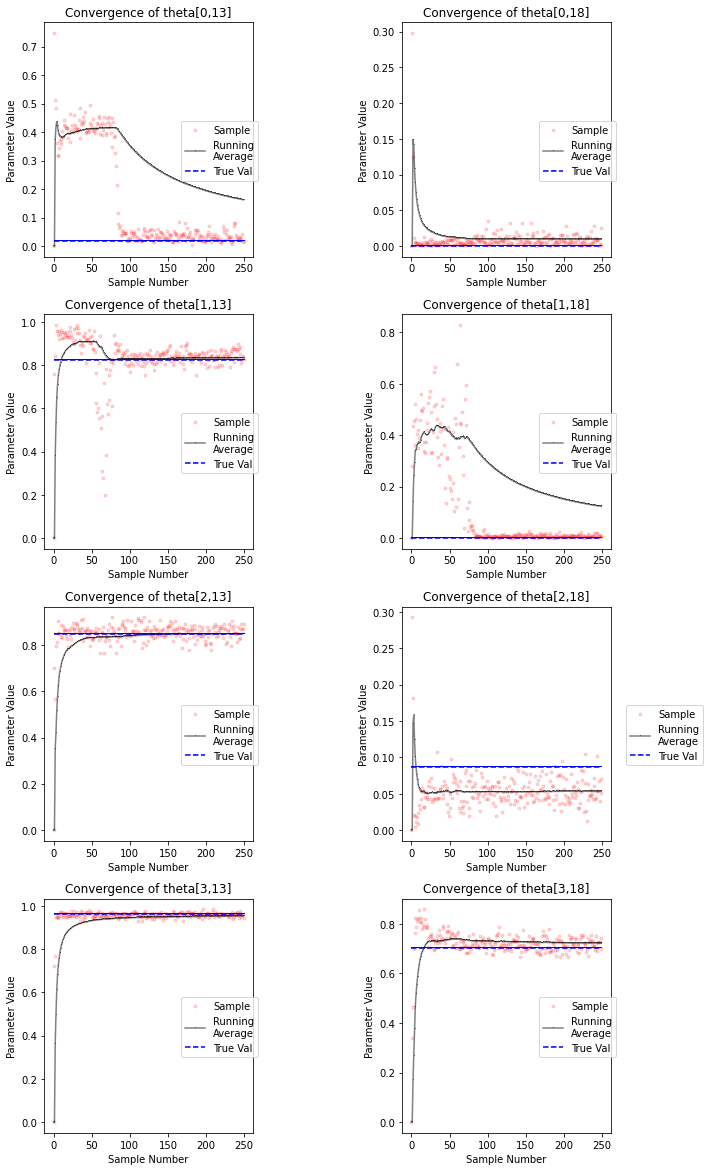

In [13]:
np.random.RandomState(100)
number_of_rows = 5
number_of_cols = 2
samples_theta_params = C_list.samples_theta_params
print(samples_theta_params.shape)

# Get random indexes
c_range = [0,1,2,3]
j_range = np.random.choice(np.arange(0,samples_theta_params.shape[2]),number_of_cols)


plt.figure(figsize=(10,20))
num_plot = 1
for c in c_range:
    for j in j_range:
        running_avg = np.zeros(samples_theta_params.shape[0])
        for num_sample in range(1,samples_theta_params.shape[0]):
            running_avg[num_sample] = np.average(samples_theta_params[:num_sample, c, j])

        plt.subplot(number_of_rows,number_of_cols,num_plot)
        # Plot samples
        plt.plot(samples_theta_params[:, c, j], ".r", label="Sample",alpha=.15)
        # Plot running avg
        plt.plot(running_avg, "-k,", label="Running\nAverage",alpha=.5)
        # plot true val
        truevals = df_true_theta.iloc[mapping[c],j] * np.ones_like(running_avg)
        plt.plot(truevals, "--b,", label="True Val")
        
        plt.xlabel("Sample Number")
        plt.ylabel("Parameter Value")
        plt.title(f"Convergence of theta[{c},{j}]")
        plt.legend(bbox_to_anchor = (1.05, 0.6))
        num_plot += 1
plt.tight_layout()

# Convergence Analysis for k

(250, 1000)


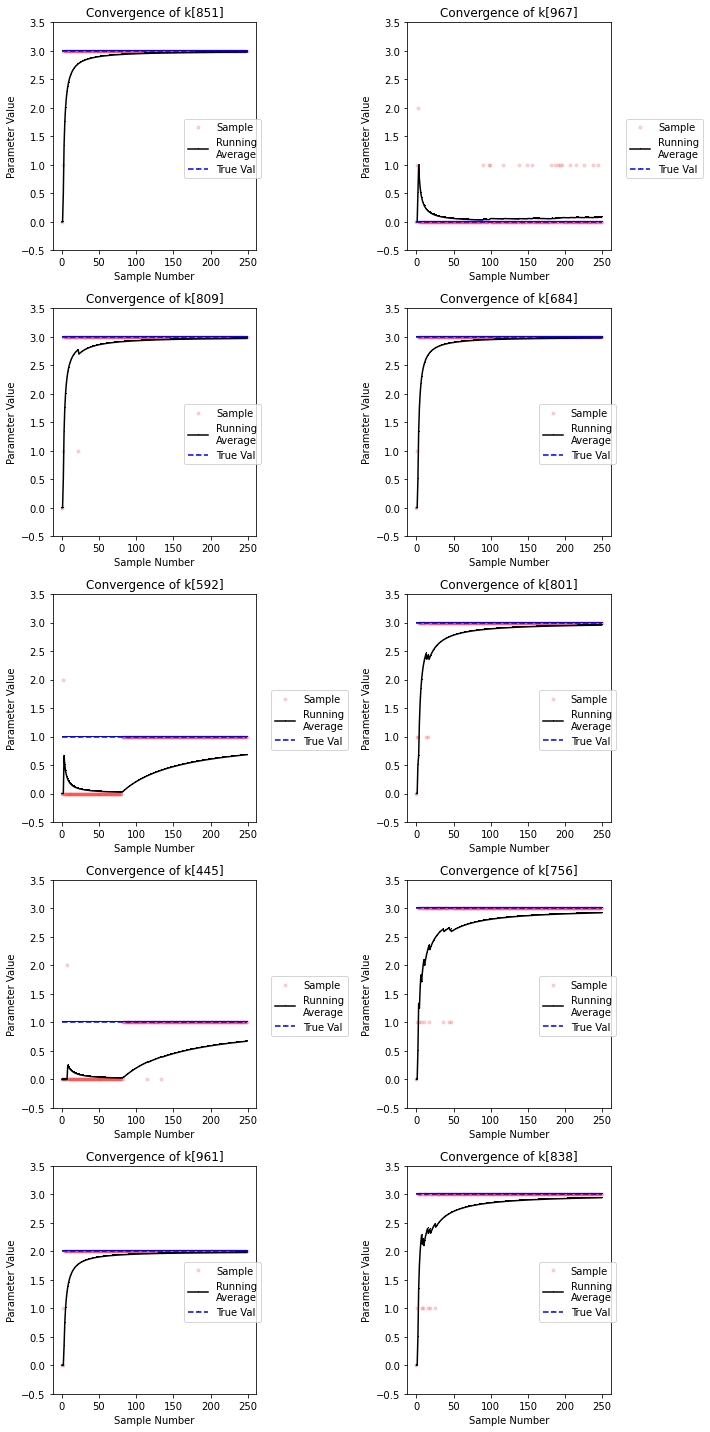

In [14]:
samples_class_assignments = C_list.samples_class_assignments
print(samples_class_assignments.shape)

# Get random indexes
i_range = np.random.choice(np.arange(0,samples_class_assignments.shape[1]),number_of_cols*number_of_rows)

plt.figure(figsize=(10,20))
num_plot = 1
for i in i_range:
    running_avg = np.zeros(samples_class_assignments.shape[0])
    for num_sample in range(1,samples_class_assignments.shape[0]):
        running_avg[num_sample] = np.average(samples_class_assignments[:num_sample, i])

    plt.subplot(number_of_rows,number_of_cols,num_plot,alpha=.5)
    # Plot samples
    plt.plot(samples_class_assignments[:, i], ".r", label="Sample",alpha=.15)
    # Plot running avg
    plt.plot(running_avg, "-k,", label="Running\nAverage")
    # plot true val
    truevals = mapping_inv[df_combined_k_mapped.iloc[i,0]] * np.ones_like(running_avg)
    plt.plot(truevals, "--b,", label="True Val")
    plt.xlabel("Sample Number")
    plt.ylabel("Parameter Value")
    plt.title(f"Convergence of k[{i}]")
    plt.legend(bbox_to_anchor = (1.05, 0.6))
    plt.ylim(-.5,3.5)
    num_plot += 1
plt.tight_layout()

# Convergence Analysis for pi

(250, 4)


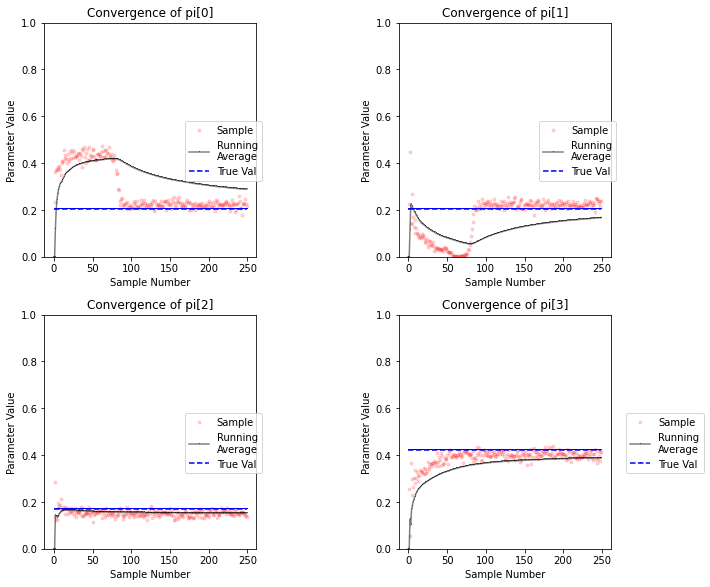

In [15]:
samples_class_probabilities = C_list.samples_class_probabilities
print(samples_class_probabilities.shape)


plt.figure(figsize=(10,20))
num_plot = 1
for c in c_range:
    running_avg = np.zeros(samples_class_probabilities.shape[0])
    for num_sample in range(1,samples_class_probabilities.shape[0]):
        running_avg[num_sample] = np.average(samples_class_probabilities[:num_sample, c])

    plt.subplot(number_of_rows,number_of_cols,num_plot)
    # Plot samples
    plt.plot(samples_class_probabilities[:, c], ".r", label="Sample",alpha=.15)
    # Plot running avg
    plt.plot(running_avg, "-k,", label="Running\nAverage",alpha=.5)
    # plot true val
    truevals = df_combined_pi_mapped.iloc[mapping[c],1] * np.ones_like(running_avg)
    plt.plot(truevals, "--b,", label="True Val")
    plt.xlabel("Sample Number")
    plt.ylabel("Parameter Value")
    plt.title(f"Convergence of pi[{c}]")
    plt.legend(bbox_to_anchor = (1.05, 0.6))
    plt.ylim(0,1)
    num_plot += 1
plt.tight_layout()

# TSNE Plot with Classes

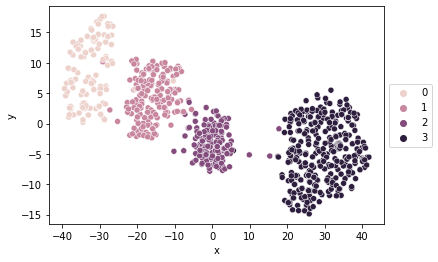

In [16]:
# Get projected data
df_proj["label"] = k.round().astype(np.int64).values
# Plot on ax
sns.scatterplot(x="x",
                y="y",
                data=df_proj,
                hue="label")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Monte Carlo Simulations

In [ ]:
num_simulations = 100 # Recommended 100
mc_samples_theta = np.zeros((num_simulations,num_classes,df.shape[1]))
mc_samples_pi = np.zeros((num_simulations,num_classes))
mc_samples_k = np.zeros((num_simulations,df.shape[0]),dtype=int)
mc_samples_true_k = np.zeros((num_simulations,df.shape[0]),dtype=int)
mc_samples_times = np.zeros((num_simulations))
mc_samples_ar_scores = np.zeros((num_simulations))

# todo find the bias, and root mean square error

for num_sim in range(num_simulations):
    # Sample new data
    mc_data, mc_k = C_list.resample()
    
    # Set up model
    C_temp = MixtureModelBernoulli(num_classes=num_classes,
                                   random_state=random_state,
                                   burn_in=burn_in,
                                   max_iter=max_iter)

    # fit the data to the model
    print(f"\nRunning simulation {num_sim+1}/{num_simulations}...",end="")
    start_time = time.time()
    C_temp.fit(mc_data)
    total_time = time.time() - start_time
    print("DONE!")
    print(f"Total time: {round(total_time,5)} (secs)")
    theta_temp, pi_temp, k_temp = C_temp.get_params()
    
    # Find Freq table for reindexing
    freq_table = pd.DataFrame()
    freq_table["True Class"] = C_list.mean_class_assignments
    freq_table["Pred Class"] = k_temp
    freq_table["Ones"] = 1
    # To make sure each class is covered
    freq_table.loc[len(freq_table)] = [0,0,0]
    freq_table.loc[len(freq_table)] = [1,1,0]
    freq_table.loc[len(freq_table)] = [3,2,0]
    freq_table.loc[len(freq_table)] = [3,3,0]
    freq_table = freq_table.pivot_table(columns="Pred Class",
                                        index="True Class",
                                        values="Ones",
                                        aggfunc=sum)
    freq_table = freq_table.fillna(0)
    
    # Reindex
    mapping = np.argmax(freq_table.to_numpy(), axis=0)
    mapping_inv = np.argmax(freq_table.to_numpy(), axis=1)
    k_temp = mapping[k_temp]
    pi_temp = pi_temp[mapping_inv]
    theta_temp = theta_temp[mapping_inv]
    
    # Append
    mc_samples_theta[num_sim] = theta_temp
    mc_samples_pi[num_sim] = pi_temp
    mc_samples_k[num_sim] = k_temp
    mc_samples_true_k[num_sim] = mc_k
    mc_samples_times[num_sim] = total_time
    mc_samples_ar_scores[num_sim] = adjusted_rand_score(k_temp,C_list.mean_class_assignments)
print("----------------------")
print("DONE!!!")
print(f"Ran {num_simulations} Simulations in {round(np.sum(mc_samples_times),3)} total secs ")
print(f"Average: {np.sum(mc_samples_times)/num_simulations:.4f} (secs) ")


Running simulation 1/100...DONE!
Total time: 16.85369 (secs)

Running simulation 2/100...DONE!
Total time: 16.9997 (secs)

Running simulation 3/100...DONE!
Total time: 17.19367 (secs)

Running simulation 4/100...DONE!
Total time: 17.21975 (secs)

Running simulation 5/100...DONE!
Total time: 17.18375 (secs)

Running simulation 6/100...DONE!
Total time: 17.08525 (secs)

Running simulation 7/100...DONE!
Total time: 17.24618 (secs)

Running simulation 8/100...DONE!
Total time: 17.05277 (secs)

Running simulation 9/100...DONE!
Total time: 16.97001 (secs)

Running simulation 10/100...DONE!
Total time: 16.85066 (secs)

Running simulation 11/100...DONE!
Total time: 16.95142 (secs)

Running simulation 12/100...DONE!
Total time: 17.3095 (secs)

Running simulation 13/100...DONE!
Total time: 17.23536 (secs)

Running simulation 14/100...DONE!
Total time: 16.82783 (secs)

Running simulation 15/100...DONE!
Total time: 17.16095 (secs)

Running simulation 16/100...DONE!
Total time: 17.06488 (secs)

Ru

## K-vectors of MC samples

In [ ]:
df_k_vecs = pd.DataFrame(mc_samples_k)
df_k_vecs.loc["True"] = C_list.mean_class_assignments
df_k_vecs

## Bias

In [ ]:
bias_theta = np.average(mc_samples_theta,axis=0) - C_list.mean_theta_params
bias_pi = np.average(mc_samples_pi,axis=0) - C_list.mean_class_probabilities

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(bias_theta)
plt.title("Bias Theta")
fig.colorbar(cax)

# Old code for analyzing K. The problem is this variable is categorical
# bias_k = np.average(mc_samples_k,axis=0) - C_list.mean_class_assignments
# fig = plt.figure()
# ax = fig.add_subplot(111)
# cax = ax.imshow(bias_k[:,np.newaxis],aspect=.01)
# plt.title("Bias K")
# fig.colorbar(cax)
# Find adjusted random score for each simulation

fig = plt.figure()
plt.hist(mc_samples_ar_scores)
plt.show()
    
    
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(bias_pi[:,np.newaxis])
plt.title("Bias Pi")
fig.colorbar(cax)

## MSE

In [ ]:
MSE_theta = bias_theta**2 * num_simulations
MSE_pi = bias_pi**2 * num_simulations

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(MSE_theta)
plt.title("MSE Theta")
fig.colorbar(cax)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(MSE_pi[:,np.newaxis])
plt.title("MSE Pi")
fig.colorbar(cax)